# Morning Exercise

## Exercise 2: some heat data

[1]: Scatter Diagram of Data... looks like a linear relationship


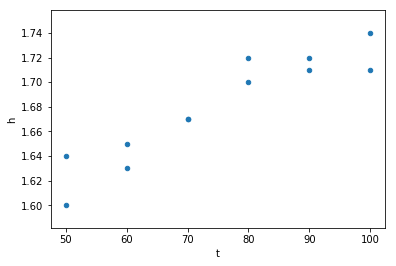

In [7]:
import pandas as pd
%matplotlib inline
t = [50, 60, 70, 80, 90, 100]
h1 = [ 1.64, 1.63, 1.67, 1.72, 1.71, 1.71]
h2 = [1.6, 1.65, 1.67, 1.7, 1.72, 1.74]

df = pd.DataFrame( {'t': t + t, 'h': h1 + h2})
print("[1]: Scatter Diagram of Data... looks like a linear relationship")
df.plot(kind = "scatter", x= 't', y='h')

In [17]:
import statsmodels.formula.api as smf

# create a fitted model in one line
l_model = smf.ols(formula = 'h ~ t', data = df).fit()

t_predict = [85]
df_predict = pd.DataFrame({'t': t_predict})
strOut = "\n\nWith t= {}, the predicted heat from this model is {}".format(t_predict, l_model.predict(df_predict)[0])
print(strOut)

print( "\n\nHere's the linear model summary \n\n" + str(l_model.summary()))



With t= [85], the predicted heat from this model is 1.7025714285714284


Here's the linear model summary 

                            OLS Regression Results                            
Dep. Variable:                      h   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     64.41
Date:                Tue, 27 Mar 2018   Prob (F-statistic):           1.15e-05
Time:                        12:13:09   Log-Likelihood:                 33.219
No. Observations:                  12   AIC:                            -62.44
Df Residuals:                      10   BIC:                            -61.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


## Exercise 3: Persian Carpet Price

Text(0,0.5,'price in GBP')

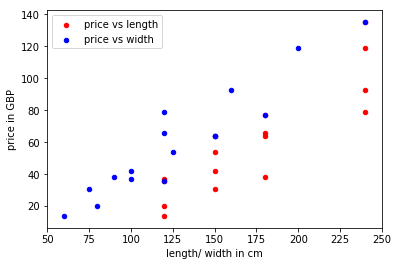

In [54]:
# Data
price = [14, 20, 37, 36, 31, 42, 54, 64, 38, 66, 64, 77, 79, 93, 119, 135]
length = [120, 120, 120, 120, 150, 150, 150, 150, 180, 180, 180, 180, 240, 240, 240, 240]
width = [60, 80, 100, 120, 75, 100, 125, 150, 90, 120, 150, 180, 120, 160, 200, 240]

# Scatter plot
df = pd.DataFrame( {'price': price, 'length': length, 'width': width})
ax1 = df.plot(kind = "scatter", x = 'length', y = 'price', color = 'r', label = 'price vs length')
ax2 = df.plot(kind = "scatter", x = 'width', y = 'price', color = 'b', label = 'price vs width', ax = ax1)
ax1.set_xlabel('length/ width in cm')
ax1.set_ylabel('price in GBP')

In [55]:
# create a fitted model in one line
l_model = smf.ols(formula = 'price ~ length + width', data = df).fit()
print(l_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     300.4
Date:                Tue, 27 Mar 2018   Prob (F-statistic):           1.31e-11
Time:                        16:06:21   Log-Likelihood:                -47.804
No. Observations:                  16   AIC:                             101.6
Df Residuals:                      13   BIC:                             103.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -52.6714      5.345     -9.854      0.0

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [58]:
#Prediction
df_predict = pd.DataFrame( {'length': [200], 'width': [150]})
carpet_predict = l_model.predict(df_predict)
print("given l=200, w=150, price is predicted to be {}".format(carpet_predict[0]))

given l=200, w=150, price is predicted to be 78.6142857142857


In [33]:
# for F distribution

from scipy.stats import distributions as dists

fcritical = dists.f.ppf(q= 1-0.05, dfn= 2, dfd= 13)  # Q(confidence level), dfn(Degree of Freedom), dfd(degree of freedom residuals)

outStr = """
    Since our linear test's f-value, {}, is much higher than the f-critical (at 95% confidence) value of {}. \n 
    we reject the null hypothesis that price is not correlated to length nor width.
    """.format(l_model.fvalue, fcritical)

print(outStr)


    Since our linear test's f-value, 300.43489898638154, is much higher than the f-critical (at 95% confidence) value of 3.805565252978057. 
 
    we reject the null hypothesis that price is not correlated to length nor width.
    


we are 95% confident that Price of Persian carpets is correlated with both its price and width.

## Exercise 4: Devon Motor Racing Grand Prix

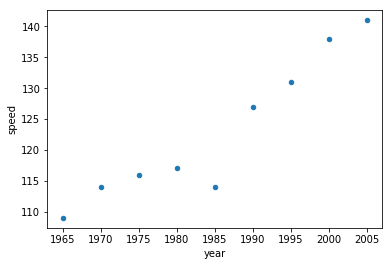

In [60]:
# data
year = [1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005]
speed = [109, 114, 116, 117, 114, 127, 131, 138, 141]
df = pd.DataFrame( {'year': year, 'speed': speed})

df.plot(kind = "scatter", y = 'speed', x = 'year')

given the scatter plot, it does look like that **average winning speed** is somewhat linearly related to time/ year

In [ ]:
# create a fitted model in one line
l_model = smf.ols(formula = 'speed ~ year', data = df).fit()

from statsmodels.stats import anova
anova_tbl = anova.anova_lm(l_model)
outStr = """
    Total Sum of Squares: {} \n
    Regression Sum of Squares: {}\n
    Error Mean Square: {}
    """.format(anova_tbl.sum_sq['year'] + anova_tbl.sum_sq['Residual'], anova_tbl.sum_sq['year'], anova_tbl.mean_sq['Residual'])
print(outStr)

print(anova_tbl)


Ommitting the 1985 data point gives a much higher f-value, t-value, and r-square. So it's preferred.

In [42]:
new_df = df[df.year != 1985]

# create a fitted model in one line
l_model = smf.ols(formula = 'speed ~ year', data = new_df).fit()

print(l_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  speed   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     275.9
Date:                Tue, 27 Mar 2018   Prob (F-statistic):           3.04e-06
Time:                        15:43:06   Log-Likelihood:                -15.188
No. Observations:                   8   AIC:                             34.38
Df Residuals:                       6   BIC:                             34.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1463.8750     95.601    -15.312      0.0

/Users/JHO/.virtualenvs/accelerateHK3/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [53]:
l_predict_years = [1985, 2010]
df_predict = pd.DataFrame({'year': l_predict_years})

fut_predict = l_model.predict(df_predict)
outStr = """
    1985: {}\n
    2010: {}\n
    160 mph by {} with 99% confidence given the {} observations
    """.format( fut_predict[0], fut_predict[1], (160 - l_model.params[0]) / l_model.params[1], l_model.nobs)
print(outStr)


    1985: 124.12500000000068

    2010: 144.12500000000023

    160 mph by 2029.84375 with 99% confidence given the 8.0 observations
    


# Exercise 5: metal discoloring

AxesSubplot(0.125,0.125;0.775x0.755)


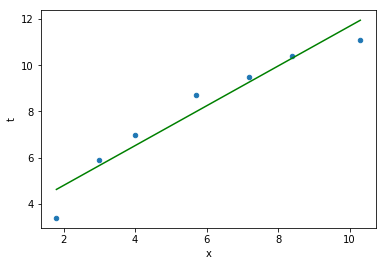

In [83]:
# data
x = [1.8, 3, 4, 5.7, 7.2, 8.4, 10.3]
t = [3.4, 5.9, 7, 8.7, 9.5, 10.4, 11.1]
df = pd.DataFrame({'x': x, 't': t})

import numpy as np
ax1 = df.plot(kind= 'scatter', x = 'x', y = 't')
f = lambda x: 3.072 + 0.8617 * x
x_text = np.array([df.x.min(), df.x.max()])
ax1.plot(x_text , f(x_text), color='green')
print(ax1)